Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

---

MTH765P - Coursework 4 
This is a template notebook for the last coursework assignment for MTH765P,
Closely follow the instructions in this template in order 
to complete the assessment and to obtain full marks. Please only
modify cells where you are instructed to do so. Failure to comply
may result in unexpected errors that can lead to mark deductions.

Author: Primoz Skraba


As usual, we begin by loading the necessary libraries. You should not 
import any other libraries.

In [2]:
import sqlite3 
import pandas as pd
import numpy as np

## Question 1 (30 points): 

-----------------------------------------


a.)  **(10 points)** Create a sqlite database called **nanoim.db** with the following tables.
- All numbers should be integers
- IDs should be the primary key
- All other entries should be of type TEXT

Be sure to close the table once you have created it. 

<h1><center>Movies</center></h1>

|MovieID  | Movie |Actor |Director|
|  :--:|  :----: |  :----:| :----:|
|1 | Idiocracy| 1 |4|
|2 | Predator |2 |1|
|3 | The Room |4  |2|
|4 | Point Break  |3 | 3 |


<h1><center>Actors</center></h1>

|ActorID  | Name | Rank|
|  :--:|  :----: |  :----:|
|1 |Terry Crews|3|
|2 | Arnold Schwarzenegger |2|
|3 |Keanu Reeves | 1 |
|4 |Tommy Wiseau |4|


<h1><center>Directors </center></h1>

|DirectorID  | Name |
|  :--:|  :----: | 
|1 |John McTiernan| 
|2 |Tommy Wiseau|
|3 |Kathryn Bigelow |
|4 |Mike Judge|





In [3]:
conn=sqlite3.connect('nanoim.db')

In [4]:
# Create cursor object
cursorObject = conn.cursor()

# Create the three tables
cursorObject.execute("""CREATE TABLE Movies(MovieID integer PRIMARY KEY, Movie text, Actor int, Director int)""")
cursorObject.execute("""CREATE TABLE Actors(ActorID integer PRIMARY KEY, Name text, Rank int)""")
cursorObject.execute("""CREATE TABLE Directors(DirectorID integer PRIMARY KEY, Name text)""")

# Insert values into Movies
cursorObject.execute("""INSERT INTO Movies VALUES(1, 'Idiocracy', 1, 4)""")
cursorObject.execute("""INSERT INTO Movies VALUES(2, 'Predator', 2, 1)""")
cursorObject.execute("""INSERT INTO Movies VALUES(3, 'The Room', 4, 2)""")
cursorObject.execute("""INSERT INTO Movies VALUES(4, 'Point Break', 3, 3)""")

# Insert values into Actors
cursorObject.execute("""INSERT INTO Actors VALUES(1, 'Terry Crews', 3)""")
cursorObject.execute("""INSERT INTO Actors VALUES(2, 'Arnold Schwarzenegger', 2)""")
cursorObject.execute("""INSERT INTO Actors VALUES(3, 'Keanu Reeves', 1)""")
cursorObject.execute("""INSERT INTO Actors VALUES(4, 'Tommy Wiseau', 4)""")

# Insert values into Directors
cursorObject.execute("""INSERT INTO Directors VALUES(1, 'John McTiernan')""")
cursorObject.execute("""INSERT INTO Directors VALUES(2, 'Tommy Wiseau')""")
cursorObject.execute("""INSERT INTO Directors VALUES(3, 'Kathryn Bigelow')""")
cursorObject.execute("""INSERT INTO Directors VALUES(4, 'Mike Judge')""")

# Commit the changes
conn.commit()

# Close the connection
conn.close()

----------------
----------------

b) (2 Point) Reconnect with **nanoim.db** in a connection named _conn_

----------------

In [5]:
conn=sqlite3.connect('nanoim.db')

For the rest of this question you will construct SQL queries and run them.
- Make sure to store the result in the variable name given
- Make queries so that they would work if the tables are expanded or updated. 
- Use only sqlite3 functions 

---------
---------

c.) **(5 Points)** Create a following query to return names of the actors who are ranked 3rd or higher (**The highest rank is 1**). Store the result in a variable called _actors_

---------

In [6]:
cursorObject = conn.cursor()
actors = cursorObject.execute('''SELECT Name FROM Actors WHERE rank<=3''',).fetchall()
print(actors)

[('Terry Crews',), ('Arnold Schwarzenegger',), ('Keanu Reeves',)]


---------
---------

d.) **(6 Points)** Create a following query to return the name of movies starring Keanu Reeves. Store the result in a variable called _keanu_

---------

In [7]:
cursorObject = conn.cursor()
keanu = cursorObject.execute('''SELECT Movie FROM Movies 
                                 INNER JOIN Actors ON Actors.ActorID=Movies.Actor
                                 WHERE Name ='Keanu Reeves' ''',).fetchall()
print(keanu)

[('Point Break',)]


---------
---------

e.) **(6 Points)** Create a following query to return the directors of movies starring Tommy Wiseau. Store the result in a variable called _tommy_

---------

In [8]:
cursorObject = conn.cursor()
tommy = cursorObject.execute('''SELECT Name FROM Directors 
                                 INNER JOIN Movies ON Movies.Director=Directors.DirectorID
                                 WHERE Actor IN
                                 (SELECT ActorID FROM Actors
                                 WHERE Name = 'Tommy Wiseau')''',).fetchall()
print(tommy)

[('Tommy Wiseau',)]


----------
----------
f) **(1 Point)** Close the connection.

----------

In [9]:
conn.close()

## Question 2 (30 Points)
------------

We will connect to the database given in the file **music.db**. This database has quite a large
number of tables. We will deal with the following tables which have the following
columns.
- album: album id, title, artist id
- artist: artist id, name
- genre: genre id, name
- track: track id, name, album id, media type id, genre id, composer, milliseconds, bytes, unit price

In [22]:
m_conn = sqlite3.connect('music.db')

--------------
--------------
a.) **(6 points)** Construct a query which lists the  albums  Red Hot Chili Peppers have in the database and put it into variable called _rhcp_

--------------

In [23]:
cursorObject = m_conn.cursor()
rhcp = cursorObject.execute('''SELECT title FROM album 
                               INNER JOIN artist ON artist.artist_id=album.artist_id
                               WHERE name ='Red Hot Chili Peppers' ''',).fetchall()
print(rhcp)

[('Blood Sugar Sex Magik',), ('By The Way',), ('Californication',)]


--------------
--------------
b.) **(6 points)** Construct a query which lists  all the tracks on the album Achtung Baby and store the result in a variable called _u2_

--------------

In [24]:
cursorObject = m_conn.cursor()
u2 = cursorObject.execute('''SELECT name FROM track 
                             INNER JOIN album ON album.album_id=track.album_id
                             WHERE title ='Achtung Baby' ''',).fetchall()
print(u2)

[('Zoo Station',), ('Even Better Than The Real Thing',), ('One',), ('Until The End Of The World',), ("Who's Gonna Ride Your Wild Horses",), ('So Cruel',), ('The Fly',), ('Mysterious Ways',), ("Tryin' To Throw Your Arms Around The World",), ('Ultraviolet (Light My Way)',), ('Acrobat',), ('Love Is Blindness',)]


--------------
--------------

c.) **(8 points)** Construct a query which returns how much it would cost to buy all Metallica songs to the nearest pound and store it in a variable called _rockon_
- You should assume the track costs are in pounds

---------------

In [25]:
cursorObject = m_conn.cursor()
rockon = cursorObject.execute('''SELECT ROUND(SUM(unit_price),0) FROM track 
                                 INNER JOIN album ON album.album_id=track.album_id
                                 WHERE artist_id IN
                                 (SELECT artist_id FROM artist
                                 WHERE name='Metallica')''',).fetchall()
print(rockon)

[(111.0,)]


--------------
--------------

d.) **(10 points)** Construct a query which returns the name and the length of the longest Rock song and transforms it in seconds (to the nearest second) and stores the name in a variable called _longsong_ and the length in a variable called _time_

---------------

In [26]:
cursorObject = m_conn.cursor()
longsong,time  = cursorObject.execute('''SELECT name, ROUND(milliseconds/1000.0,0) FROM track 
                                         WHERE milliseconds = (SELECT MAX(milliseconds) FROM track
                                         INNER JOIN genre ON genre.genre_id=track.genre_id
                                         WHERE genre.name='Rock')''',).fetchall()[0]

print(longsong,time)

Dazed And Confused 1612.0


In [27]:
m_conn.close()

## Question 3 (30 Points)
------------


We will connect to the database given in the file **eateries.sqlite**. This database has health inspection violations for San Francisco stored in 3 tables
- 'businesses'
- 'inspections'
- 'violations'

The cell below will print out the columns of the tables as pandas dataframes so you can examine them and then construct the queries. Unless otherwise stated you must only use SQL to get full marks. 

In [16]:
# This will open the connection
# and print out the tables

# the function takes as input the Cursor_Object and 
# returns the table in form of pd.DataFrame()
def sql_to_frame(cu):
    data = cu.fetchall()
    data = list(list(x) for x in data)
    dataColumns = [column[0] for column in cu.description]
    df = pd.DataFrame(data, columns=dataColumns)
    return df 


e_conn = sqlite3.connect('eateries.sqlite')
c = e_conn.cursor()
table_list =['businesses','inspections','violations']
for t in table_list:
    print(t)
    c.execute(f"PRAGMA table_info({t});")
    display(sql_to_frame(c))

businesses


,cid,name,type,notnull,dflt_value,pk
0,0,business_id,INTEGER,1,None,0
1,1,name,VARCHAR(64),0,None,0
2,2,address,VARCHAR(50),0,None,0
3,3,city,VARCHAR(23),0,None,0
4,4,postal_code,VARCHAR(9),0,None,0
5,5,latitude,FLOAT,0,None,0
6,6,longitude,FLOAT,0,None,0
7,7,phone_number,BIGINT,0,None,0
8,8,TaxCode,VARCHAR(4),0,None,0
9,9,business_certificate,INTEGER,0,None,0


inspections


,cid,name,type,notnull,dflt_value,pk
0,0,business_id,TEXT,1,None,0
1,1,Score,INTEGER,0,None,0
2,2,date,TEXT,1,None,0
3,3,type,VARCHAR(33),1,None,0


violations


,cid,name,type,notnull,dflt_value,pk
0,0,business_id,TEXT,1,None,0
1,1,date,TEXT,1,None,0
2,2,ViolationTypeID,TEXT,1,None,0
3,3,risk_category,TEXT,1,None,0
4,4,description,TEXT,1,None,0


-----------
-----------

a.) **(6 points)** How many restaurants do not have a precise geographic location given. Store the number (and only the number) in a variable called _locations_.

------------


In [17]:
cursorObject = e_conn.cursor()
# "The City will provide financial relief for businesses with a Restaurant permit \
# (restaurant permits include H24, H25 and H26 only)" - Source: https://sftreasurer.org/covid19
# San Francisco tax codes for restaurants - H24, H25, H26
locations = cursorObject.execute('''SELECT COUNT(name) FROM businesses
                                    WHERE address IS NULL AND latitude IS NULL 
                                    AND TaxCode IN ('H24','H25','H26')''',).fetchall()[0][0]
print(locations)

1



-----------
-----------

b.)  **(8 points )** How many spellings of San Francisco are there? (You can assume that all variations count including modifiers such as north, south, east, west) also refer to San Francisco. **You can obtain the result through visual inspection**. Store the number in a variable called _SF_

------------


In [18]:
cursorObject = e_conn.cursor()
SF_query = cursorObject.execute('''SELECT DISTINCT city FROM businesses''',).fetchall()
not_SF = ['Novato', 'FOSTER CITY', 'DALY CITY','OAKLAND', 'HAYWARD', 'SAN BRUNO', 'CA', 'Oakland', None]
SF_variants = [n[0] for n in SF_query if n[0] not in not_SF]
SF = len(SF_variants)
print(SF)

33



-----------
-----------

c.) **(16 points)**  Create a histogram plot of the Inspection Scores for January 2014. 
- Here you should use the function _sql_to_frame()_ which takes a query and returns a pandas dataframe.
- Remove any null values
------------


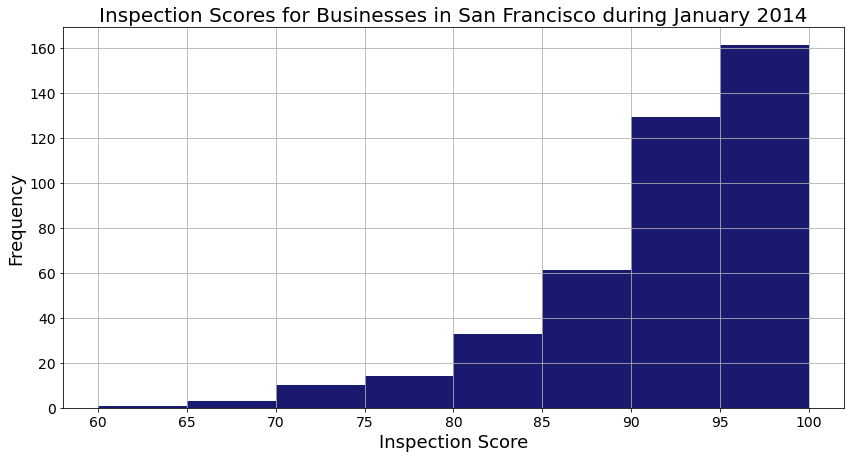

In [19]:
# Establishing the cursor
cursorObject = e_conn.cursor()

# Selecting the inspection scores filtered by date
scores = cursorObject.execute('''SELECT Score FROM inspections
                                 WHERE date BETWEEN 20140101 AND 20140131''',)

# Converting the SQL search results into a pandas dataframe
inspection_scores = sql_to_frame(scores).dropna()
inspection_scores.rename(columns={'Score':'Inspection Score'},inplace=True)

# Plotting the data from the dataframe into a histogram
ax = inspection_scores.hist(figsize=(14,7),xlabelsize=14,ylabelsize=14,bins=range(60,100+1,5),color = "midnightblue");
ax[0][0].set_title('Inspection Scores for Businesses in San Francisco during January 2014', fontsize = 20);
ax[0][0].set_xlabel('Inspection Score', fontsize = 18);
ax[0][0].set_ylabel('Frequency', fontsize = 18);

In [20]:
e_conn.close()